In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.Points import DivisionGames,DivisionSets,RallyParsing, RallyParsing, RallyExtraction
from utils.Visuals import GetCourt
from utils.SeqMining import CallPrefixSpan,check_list_contained,SortPatterns,Seqmining,GetStrokes,Sequencer,find_contiguous_patterns,PatternsByStat
from utils.Stats import KeyPointsData,AllStats,Stats
import numpy as np
import os
import csv
import warnings
from sportypy.surfaces.tennis import ATPCourt, TennisCourt

In [2]:
pd.options.display.max_columns = None
warnings.filterwarnings('ignore')

In [3]:
warnings.filterwarnings('ignore')
matches = pd.read_csv('BaseData/charting-m-matches.csv', encoding='unicode_escape',quoting=csv.QUOTE_NONE)
points = pd.read_csv('ProjData/Points.csv',encoding='unicode_escape',quoting=csv.QUOTE_NONE)

FedererGames = pd.read_csv('Federer_data/FedererStart.csv')

In [4]:
a = ['S','R']
FedererPoints = pd.read_csv('Federer_data/PointsFedererStart.csv')
FedererPoints = FedererPoints[~FedererPoints['1st'].isin(a)]

# Wins and Losses

In [5]:
FedererWins = FedererGames[FedererGames['Winner'] == True]
FedererLosses = FedererGames[FedererGames['Winner'] == False]

In [6]:
FedererPointsInWins = FedererPoints[FedererPoints['match_id'].isin(FedererWins['match_id'])]
FedererPointsInLosses = FedererPoints[FedererPoints['match_id'].isin(FedererLosses['match_id'])]

In [7]:
FedererPointsWonInWins = FedererPointsInWins[FedererPointsInWins['Victor'] == True]
FedererPointsLostInWins = FedererPointsInWins[FedererPointsInWins['Victor'] == False]

In [9]:
PointTypees = ['Winner','Ace','Double Fault','Forced Error','Unforced Error']

In [ ]:
print('Percentages of Points: \n --------------------------------------------')
data = [Stats(FedererPoints,FedererGames,pt_results=True)]

Percentages of Points: 
 --------------------------------------------


NameError: name 'Stats' is not defined

In [11]:
print('Percentages of Points in Wins: \n --------------------------------------------')
data = [Stats(FedererPoints,FedererGames,result=True,pt_results=True)]

print('Percentages of Points in Losses: \n --------------------------------------------')
data = [Stats(FedererPoints,FedererGames,result=False,pt_results=True)]

Percentages of Points in Wins: 
 --------------------------------------------
Aces => 0.0907
Winners => 0.2696
Forced Errors => 0.3267
Unforced Errors => 0.2811
Double Faults => 0.032 

Percentages of Points in Losses: 
 --------------------------------------------
Aces => 0.0812
Winners => 0.2741
Forced Errors => 0.3461
Unforced Errors => 0.2719
Double Faults => 0.0266 



In [12]:
print('Percentages of Points in Wins on Grass: \n --------------------------------------------')
data = [Stats(FedererPoints,FedererGames,surface='Grass',result=True,pt_results=True)]

print('Percentages of Points in Losses on Grass: \n --------------------------------------------')
data = [Stats(FedererPoints,FedererGames,surface='Grass',result=False,pt_results=True)]

print('Percentages of Points in Wins on Hard: \n --------------------------------------------')
data = [Stats(FedererPoints,FedererGames,surface='Hard',result=True,pt_results=True)]

print('Percentages of Points in Losses on Hard: \n --------------------------------------------')
data = [Stats(FedererPoints,FedererGames,surface='Hard',result=False,pt_results=True)]

print('Percentages of Points in Wins on Clay: \n --------------------------------------------')
data = [Stats(FedererPoints,FedererGames,surface='Clay',result=True,pt_results=True)]

print('Percentages of Points in Losses on Clay: \n --------------------------------------------')
data = [Stats(FedererPoints,FedererGames,surface='Clay',result=False,pt_results=True)]

Percentages of Points in Wins on Grass: 
 --------------------------------------------
Aces => 0.1263
Winners => 0.2404
Forced Errors => 0.3441
Unforced Errors => 0.267
Double Faults => 0.0222 

Percentages of Points in Losses on Grass: 
 --------------------------------------------
Aces => 0.1056
Winners => 0.2673
Forced Errors => 0.4076
Unforced Errors => 0.198
Double Faults => 0.0215 

Percentages of Points in Wins on Hard: 
 --------------------------------------------
Aces => 0.09
Winners => 0.2679
Forced Errors => 0.3238
Unforced Errors => 0.284
Double Faults => 0.0342 

Percentages of Points in Losses on Hard: 
 --------------------------------------------
Aces => 0.0868
Winners => 0.2703
Forced Errors => 0.3355
Unforced Errors => 0.2778
Double Faults => 0.0295 

Percentages of Points in Wins on Clay: 
 --------------------------------------------
Aces => 0.0646
Winners => 0.2977
Forced Errors => 0.3218
Unforced Errors => 0.2833
Double Faults => 0.0326 

Percentages of Points in

In [13]:
def PlotGraph(data,surface, columns, won):

    Won = data[0]
    Lost = data[1]
    barWidth = 0.25
    
    plt.subplots(figsize =(8, 4))
    br1 = np.arange(len(Won)) 
    br2 = [x + barWidth for x in br1] 
    plt.bar(br1, Won, color= 'blue', alpha = 0.7,
            width = barWidth)
    plt.bar(br2, Lost, color= 'red', alpha = 0.7,
            width = barWidth)
    
    plt.xticks([r + barWidth for r in range(len(columns))], 
            columns)

    
    plt.ylabel("Percentages")
    plt.title(f"Result of Points for Federer in Games {won}")
    plt.legend(['Won','Lost'])

    plt.show()

In [14]:
# PlotGraph(data,'cl',PointTypees,'Won')

# Saques e Recepções

In [15]:
FedererServesPoints = FedererPoints[FedererPoints['Server'] == True]
FedererReceptionPoints = FedererPoints[FedererPoints['Server'] == False]

FedererServesW = FedererServesPoints[FedererServesPoints['Victor'] == True]
FedererServesL = FedererServesPoints[FedererServesPoints['Victor'] == False]

FedererReceptionW= FedererReceptionPoints[FedererReceptionPoints['Victor'] == True]
FedererReceptionL= FedererReceptionPoints[FedererReceptionPoints['Victor'] == False]

# Games e Sets Stats

In [16]:
FedererServePointsGameW = FedererServesPoints[FedererServesPoints['GameWinner'] == True]
FedererServePointsGameL = FedererServesPoints[FedererServesPoints['GameWinner'] == False]

FedererServePointsSetW = FedererServesPoints[FedererServesPoints['SetWinner'] == True]
FedererServePointsSetL = FedererServesPoints[FedererServesPoints['SetWinner'] == False]

FedererReceptionPointsGameW = FedererReceptionPoints[FedererReceptionPoints['GameWinner'] == True]
FedererReceptionPointsGameL = FedererReceptionPoints[FedererReceptionPoints['GameWinner'] == False]

FedererReceptionPointsSetW = FedererReceptionPoints[FedererReceptionPoints['SetWinner'] == True]
FedererReceptionPointsSetL = FedererReceptionPoints[FedererReceptionPoints['SetWinner'] == False]

In [17]:
SetDict = DivisionSets(FedererPoints,FedererPoints['match_id'].unique())

In [18]:
def MeanPoints(division):
    Mean = 0
    Divisions = []
    num_divisions = 0
    for k in division.keys():
        divisions = 0
        Match = division[k]
        divisions = len(Match)
        num_divisions += divisions

        for d in Match:
            Mean += len(d)
        
        Divisions.append(divisions)
    
    return (Mean/num_divisions, Divisions)

# Visualizações

In [19]:
court = GetCourt('Grass')

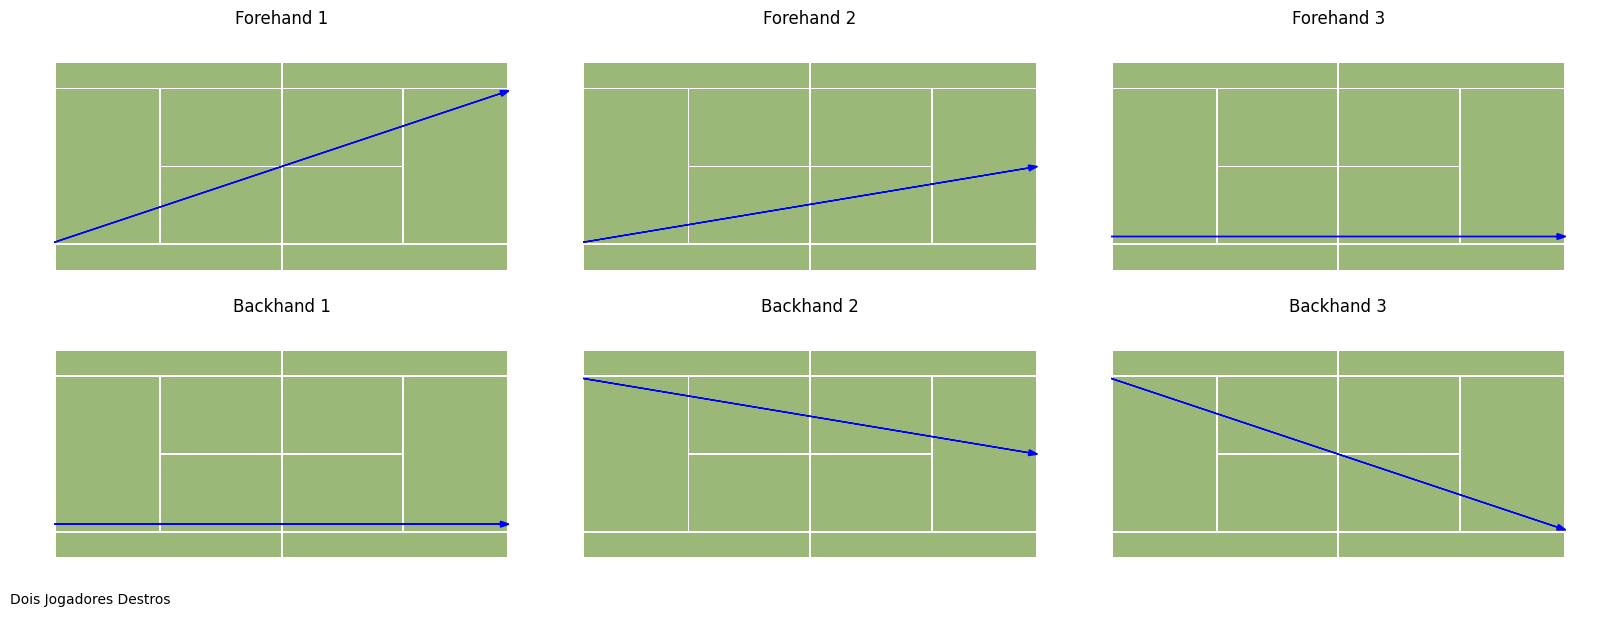

In [20]:
fig, ax = plt.subplots(figsize=(16,6),nrows=(2),ncols=(3))

ax[0][0].set_title('Forehand 1')
ax[0][1].set_title('Forehand 2')
ax[0][2].set_title('Forehand 3')
court.draw(ax=ax[0][0],display_range='full')
court.draw(ax=ax[0][1],display_range='full')
court.draw(ax=ax[0][2],display_range='full')
court.arrow(ax=ax[0][0],x1= -39.0, y1= -13.0, x2=39.0, y2=13.0,color= 'blue')
court.arrow(ax=ax[0][1],x1= -39.0, y1= -13.0, x2=39.0, y2=0,color= 'blue')
court.arrow(ax=ax[0][2],x1= -39.0, y1= -12.0, x2=39.0, y2=-12.0,color= 'blue')

ax[1][0].set_title('Backhand 1')
ax[1][1].set_title('Backhand 2')
ax[1][2].set_title('Backhand 3')
court.draw(ax=ax[1][0],display_range='full')
court.draw(ax=ax[1][1],display_range='full')
court.draw(ax=ax[1][2],display_range='full')
court.arrow(ax=ax[1][0],x1= -39.0, y1= -12.0, x2=39.0, y2=-12.0,color= 'blue')
court.arrow(ax=ax[1][1],x1= -39.0, y1= 13.0, x2=39.0, y2=0,color= 'blue')
court.arrow(ax=ax[1][2],x1= -39.0, y1= 13.0, x2=39.0, y2=-13.0,color= 'blue')

axes = ax.ravel()

fig.tight_layout()
fig.text(s='Dois Jogadores Destros',y=0.0,x=0.0)
plt.show()

In [21]:
Sequences, Endings = Sequencer(FedererServePointsGameW)
Patterns = CallPrefixSpan(Sequences, 100, k=5)
SortedPatterns = SortPatterns(Patterns)
contiguous_patterns = find_contiguous_patterns(Sequences,30,k=5)
SortedContiguousPatterns = SortPatterns(contiguous_patterns)

In [22]:
WinnerPatterns = PatternsByStat('Winner',FedererServesW,20,4)

In [23]:
FEPatterns = PatternsByStat('Forced Error',FedererPointsInWins,50,4)

In [24]:
FEPatterns

[(123,
  ('Backhand Paralelo',
   'Backhand Paralelo',
   'Backhand Paralelo',
   'Backhand Paralelo')),
 (74,
  ('Forehand Cruzado',
   'Forehand Cruzado',
   'Forehand Cruzado',
   'Forehand Paralelo')),
 (72,
  ('Forehand Cruzado',
   'Forehand Cruzado',
   'Forehand Cruzado',
   'Forehand Cruzado')),
 (70,
  ('Backhand Meio',
   'Forehand Cruzado',
   'Forehand Cruzado',
   'Forehand Paralelo')),
 (64,
  ('Forehand Paralelo',
   'Backhand Meio',
   'Forehand Cruzado',
   'Forehand Cruzado')),
 (63,
  ('Forehand Cruzado',
   'Forehand Cruzado',
   'Forehand Paralelo',
   'BH Slice Paralelo')),
 (54,
  ('Forehand Cruzado',
   'Forehand Cruzado',
   'Forehand Paralelo',
   'Backhand Paralelo')),
 (52,
  ('Backhand Paralelo',
   'Backhand Paralelo',
   'Backhand Paralelo',
   'Backhand Cruzado')),
 (52,
  ('Backhand Paralelo',
   'Backhand Paralelo',
   'Backhand Paralelo',
   'Backhand Paralelo',
   'Backhand Paralelo')),
 (51,
  ('Forehand Meio',
   'Forehand Cruzado',
   'Forehand C

# Stats

In [25]:
# Create a function that returns these Stats divided by Start/ Middle/ End

In [26]:
KP = pd.read_csv('BaseData/charting-m-stats-KeyPointsServe.csv')
RallySize = pd.read_csv('BaseData/charting-m-stats-Rally.csv')

In [27]:
KP

,match_id,player,row,pts,pts_won,first_in,aces,svc_winners,rally_winners,rally_forced,unforced,dfs
0,20241017-M-Campinas_CH-R16-Camilo_Ugo_Carabell...,Camilo Ugo Carabelli,BP,5,2,3,0,0,0,2,1,0
1,20241017-M-Campinas_CH-R16-Camilo_Ugo_Carabell...,Karue Sell,BP,8,4,5,0,2,0,0,2,0
2,20241017-M-Campinas_CH-R16-Camilo_Ugo_Carabell...,Camilo Ugo Carabelli,GP,16,9,5,1,0,2,1,1,0
3,20241017-M-Campinas_CH-R16-Camilo_Ugo_Carabell...,Karue Sell,GP,9,7,6,0,3,3,0,1,0
4,20241017-M-Campinas_CH-R16-Camilo_Ugo_Carabell...,Camilo Ugo Carabelli,Deuce,10,9,10,1,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
46483,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,Luis Ayala,GP,11,6,4,0,2,0,1,3,0
46484,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,Nicola Pietrangeli,Deuce,9,5,5,0,0,1,2,2,0
46485,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,Luis Ayala,Deuce,12,6,9,0,0,3,0,2,0
46486,19600529-M-Roland_Garros-F-Nicola_Pietrangeli-...,Nicola Pietrangeli,STotal,37,18,25,0,2,3,4,10,0


In [28]:
rowsServe = ['Total','1-3','4-6','7-9','10']
rowsIndx = ['match_id','1-3','4-6','7-9','10-']
    
PlayerRallyServe = RallySize[RallySize['server'] == 'Roger Federer'].drop(columns=['server','returner'])
PlayerRallyServe = PlayerRallyServe[PlayerRallyServe['match_id'].isin(FedererGames['match_id'].unique())]
PlayerRallyServe = PlayerRallyServe[~PlayerRallyServe['row'].isin(rowsServe)]
PlayerRallyServe[['pl1_unforced','pl2_unforced']] = PlayerRallyServe[['pl2_unforced','pl1_unforced']]
PlayerRallyServe['row'] = PlayerRallyServe['row'].str[:3]


In [29]:
#pl1 actually means server, and pl2 actually means receiver

In [30]:
RallySmall = PlayerRallyServe[(PlayerRallyServe['row'] == '1-3')]     
RallyMedium = PlayerRallyServe[(PlayerRallyServe['row'] == '4-6')]
RallyBig = PlayerRallyServe[(PlayerRallyServe['row'] == '7-9')]
RallyOver = PlayerRallyServe[(PlayerRallyServe['row'] == '10-')]

In [31]:
RallyOver.sum()

match_id        20101128-M-Tour_Finals-F-Roger_Federer-Rafael_...
row             10-10-10-10-10-10-10-10-10-10-10-10-10-10-10-1...
pts                                                          1192
pl1_won                                                       542
pl1_winners                                                   229
pl1_forced                                                    139
pl1_unforced                                                  174
pl2_won                                                       650
pl2_winners                                                   187
pl2_forced                                                    183
pl2_unforced                                                  279
dtype: object

In [32]:
rowsReturn = ['Total','1-3','4-6','7-9','10']
rowsIndx = ['match_id','1-3','4-6','7-9','10-']
    
PlayerRallyReturn = RallySize[RallySize['returner'] == 'Roger Federer'].drop(columns=['server','returner'])
PlayerRallyReturn = PlayerRallyReturn[PlayerRallyReturn['match_id'].isin(FedererWins['match_id'].unique())]
PlayerRallyReturn = PlayerRallyReturn[~PlayerRallyReturn['row'].isin(rowsReturn)]
PlayerRallyReturn[['pl1_unforced','pl2_unforced']] = PlayerRallyReturn[['pl2_unforced','pl1_unforced']]
PlayerRallyReturn['row'] = PlayerRallyReturn['row'].str[:3]


In [33]:
RallySmall = PlayerRallyReturn[(PlayerRallyReturn['row'] == '1-3-1') | (PlayerRallyReturn['row'] == '1-3-2')]
RallyMedium = PlayerRallyReturn[(PlayerRallyReturn['row'] == '4-6-1') | (PlayerRallyReturn['row'] == '4-6-2')]
RallyBig = PlayerRallyReturn[(PlayerRallyReturn['row'] == '7-9-1') | (PlayerRallyReturn['row'] == '7-9-2')]
RallyOver = PlayerRallyReturn[(PlayerRallyReturn['row'] == '10-1') | (PlayerRallyReturn['row'] == '10-2')]

In [34]:
RallySmall.sum()

match_id        0
row             0
pts             0
pl1_won         0
pl1_winners     0
pl1_forced      0
pl1_unforced    0
pl2_won         0
pl2_winners     0
pl2_forced      0
pl2_unforced    0
dtype: object

In [35]:
KP = KP[KP['match_id'].isin(FedererGames['match_id'])]
FKP = KP[KP['player'] == 'Roger Federer']
FKP = FKP.drop(columns='player')

In [36]:
FKP['row'].unique()

array(['BP', 'GP', 'Deuce', 'STotal'], dtype=object)

In [37]:
FKP_BP = FKP[FKP['row'] == 'BP'].drop(columns='row')
FKP_GP = FKP[FKP['row'] == 'GP'].drop(columns='row')
FKP_Deuce = FKP[FKP['row'] == 'Deuce'].drop(columns='row')

In [38]:
Aggregate_BP = FKP_BP.sum()
Aggregate_GP = FKP_GP.sum()
Aggregate_Deuce = FKP_Deuce.sum()

In [39]:
Won = Aggregate_BP['pts_won'] / Aggregate_BP['pts']
First = Aggregate_BP['first_in'] / Aggregate_BP['pts']

# *We can use these Stats in different scenarios: % in games won vs. games lost 
#                                                   #

In [40]:
Won

np.float64(0.6483931947069943)

In [41]:
Split = pd.read_csv('BaseData/charting-m-stats-SnV.csv')

In [42]:
Split['row'].unique()

array(['SnV', 'SnV1st', 'nonSnV', 'nonSnV1st', 'nonSnV2nd', 'SnV2nd'],
      dtype=object)

In [43]:
# Find the return patterns of a specific player
FedererReceptionRallys = RallyExtraction(FedererReceptionPoints)
Return = []
Outcomes = []
FedererReceptionRallys
for r in FedererReceptionRallys:
    Return.append(r[1:4])
    Outcomes.append(r[-1])

In [45]:
a = FedererGames[0:20]

In [46]:
a

,match_id,Player 1,Player 2,Pl 1 hand,Pl 2 hand,Date,Tournament,Round,Time,Court,Surface,Umpire,Best of,Final TB?,Charted by,Winner
0,20101128-M-Tour_Finals-F-Roger_Federer-Rafael_...,Roger Federer,Rafael Nadal,R,L,20101128,Tour Finals,F,18:45,Centre,Hard,Mohamed Lahyani,3,1,Edo,True
1,20101126-M-Tour_Finals-SF-Roger_Federer-Novak_...,Roger Federer,Novak Djokovic,R,R,20101126,Tour Finals,SF,NaN,NaN,Hard,NaN,3,1,Isaac,True
2,20101121-M-Tour_Finals-RR-Andy_Murray-Roger_Fe...,Andy Murray,Roger Federer,R,R,20101121,Tour Finals,RR,NaN,Centre Court,Hard,NaN,3,1,Isaac,True
3,20101111-M-Paris_Masters-SF-Roger_Federer-Gael...,Roger Federer,Gael Monfils,R,R,20101111,Paris Masters,SF,5pm,Centre,Hard,Fergus Murphy,3,1,Edo,False
4,20101107-M-Basel-F-Novak_Djokovic-Roger_Federer,Novak Djokovic,Roger Federer,R,R,20101107,Basel,F,16:10,Centre,Hard,Mohamed Lahyani,3,1,Edo,True
5,20101024-M-Stockholm-F-Roger_Federer-Florian_M...,Roger Federer,Florian Mayer,R,R,20101024,Stockholm,F,16:15,NaN,Hard,Lars Graff,3,1,ChapelHeel66,True
6,20101017-M-Shanghai_Masters-F-Roger_Federer-An...,Roger Federer,Andy Murray,R,R,20101017,Shanghai Masters,F,17:40,Centre,Hard,Cedric Mourier,3,1,Edo,False
7,20101015-M-Shanghai_Masters-SF-Novak_Djokovic-...,Novak Djokovic,Roger Federer,R,R,20101015,Shanghai Masters,SF,NaN,Stadium,Hard,NaN,3,1,Isaac,True
8,20101010-M-Shanghai_Masters-QF-Robin_Soderling...,Robin Soderling,Roger Federer,R,R,20101010,Shanghai Masters,QF,NaN,NaN,Hard,NaN,3,1,Amy,True
9,20100903-M-US_Open-SF-Novak_Djokovic-Roger_Fed...,Novak Djokovic,Roger Federer,R,R,20100903,US Open,SF,3pm,Ashe,Hard,Enric Molina,5,1,Edo,False


In [47]:
dictionary = {}

In [48]:
ReturnDict = {
    '0' : 'Serve',
    '4' : 'Wide Serve',
    '5' : 'Body Serve',
    '6' : 'Down The T Serve',
    'f' : 'Forehand',
    'b' : 'Backhand',
    'r' : 'FH Slice',
    's' : 'BH Slice',
    'v' : 'FH Volley',
    'z' : 'BH Volley',
    '1' : ' Cruzado',
    '2' : ' Meio',
    '3' : ' Paralelo',
    '*' : 'Winner',
    '@' : 'Forced Error',
    '#' : 'Unforced Error',
    'o' :'standard overhead/smash',
    'p' :'backhand overhead/smash',
    'u' :'forehand drop shot',
    'y' :'backhand drop shot',
    'l' :'forehand lob',
    'm' :'backhand lob',
    'h' :'forehand half-volley',
    'i' :'backhand half-volley',
    'j' :'forehand swinging volley',
    'k' :'backhand swinging volley',
    'n' : 'net',
    'w' : 'wide' ,
    'd' : 'deep',
    'x' : 'both wide and deep',
    'g' : 'foot faults',
    't' : 'trick shot',
    'q' : 'unknown',
    'e' : 'any',
    '7' : 'shallow',
    '8' : 'mid',
    '9' : 'deep'
}

In [49]:
Errors = ['n','w','d','x']

In [50]:
FedererGames

,match_id,Player 1,Player 2,Pl 1 hand,Pl 2 hand,Date,Tournament,Round,Time,Court,Surface,Umpire,Best of,Final TB?,Charted by,Winner
0,20101128-M-Tour_Finals-F-Roger_Federer-Rafael_...,Roger Federer,Rafael Nadal,R,L,20101128,Tour Finals,F,18:45,Centre,Hard,Mohamed Lahyani,3,1,Edo,True
1,20101126-M-Tour_Finals-SF-Roger_Federer-Novak_...,Roger Federer,Novak Djokovic,R,R,20101126,Tour Finals,SF,NaN,NaN,Hard,NaN,3,1,Isaac,True
2,20101121-M-Tour_Finals-RR-Andy_Murray-Roger_Fe...,Andy Murray,Roger Federer,R,R,20101121,Tour Finals,RR,NaN,Centre Court,Hard,NaN,3,1,Isaac,True
3,20101111-M-Paris_Masters-SF-Roger_Federer-Gael...,Roger Federer,Gael Monfils,R,R,20101111,Paris Masters,SF,5pm,Centre,Hard,Fergus Murphy,3,1,Edo,False
4,20101107-M-Basel-F-Novak_Djokovic-Roger_Federer,Novak Djokovic,Roger Federer,R,R,20101107,Basel,F,16:10,Centre,Hard,Mohamed Lahyani,3,1,Edo,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,20050220-M-Rotterdam-F-Roger_Federer-Ivan_Ljub...,Roger Federer,Ivan Ljubicic,R,R,20050220,Rotterdam,F,15:05,Centre,Hard,Mohamed Lahyani,3,1,Edo,True
190,20050127-M-Australian_Open-SF-Roger_Federer-Ma...,Roger Federer,Marat Safin,R,R,20050127,Australian Open,SF,20:00,Centre,Hard,Enric Molina,5,0,1HandBH,False
191,20050126-M-Australian_Open-QF-Roger_Federer-An...,Roger Federer,Andre Agassi,R,R,20050126,Australian Open,QF,5pm,Rod Laver Arena,Hard,Pascal Maria,5,0,Edo,True
192,20050117-M-Australian_Open-R128-Roger_Federer-...,Roger Federer,Fabrice Santoro,R,R,20050117,Australian Open,R128,NaN,Laver,Hard,NaN,5,0,BG,True


In [51]:
string = '4f2asdasdasdas'

In [52]:
string[3]

'a'

In [53]:
if(string[3].isdigit()):
    recepcao = string[1:4]
else:
    recepcao = string[1:3]

In [54]:
recepcao

'f2'

In [55]:
GP,BP,Deuce = KeyPointsData(FedererPoints)

In [56]:
FedKeyPoints = FedererPoints[FedererPoints['Pts'].str.contains('40', na=False)]

In [57]:
FedKeyPoints[FedKeyPoints['Pts'].str.startswith('40',na=False)]

,match_id,Pt,Set1,Set2,Set#,Gm1,Gm2,Pts,Gm#,TbSet,Svr,1st,2nd,Notes,PtWinner,Player 1,Player 2,Surface,Victor,Server,GameWinner,SetWinner,Ace,Winner,Unforced Error,Forced Error,Double Fault
3,20091128-M-Tour_Finals-SF-Roger_Federer-Nikola...,4,0,0,1,0.0,0.0,40-0,1.0,True,1,4*,False,False,1,Roger Federer,Nikolay Davydenko,Hard,True,True,True,False,True,False,False,False,False
10,20091128-M-Tour_Finals-SF-Roger_Federer-Nikola...,11,0,0,1,1.0,0.0,40-40,2.0,True,2,4f27f1f1f1f1f3s2n#,False,False,2,Roger Federer,Nikolay Davydenko,Hard,False,False,False,False,False,False,False,True,False
23,20091128-M-Tour_Finals-SF-Roger_Federer-Nikola...,24,0,0,1,1.0,2.0,40-30,4.0,True,2,5f#,False,False,2,Roger Federer,Nikolay Davydenko,Hard,False,False,False,False,False,False,False,True,False
43,20091128-M-Tour_Finals-SF-Roger_Federer-Nikola...,44,0,0,1,2.0,5.0,40-0,8.0,True,2,4n,4b37b1w@,False,1,Roger Federer,Nikolay Davydenko,Hard,True,False,False,False,False,False,True,False,False
44,20091128-M-Tour_Finals-SF-Roger_Federer-Nikola...,45,0,0,1,2.0,5.0,40-15,8.0,True,2,6b2n#,False,False,2,Roger Federer,Nikolay Davydenko,Hard,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35055,20100108-M-Doha-SF-Roger_Federer-Nikolay_Davyd...,104,0,1,2,2.0,4.0,40-15,17.0,True,1,6b27f+3b2v3n#,False,False,2,Roger Federer,Nikolay Davydenko,Hard,False,True,True,False,False,False,False,True,False
35056,20100108-M-Doha-SF-Roger_Federer-Nikolay_Davyd...,105,0,1,2,2.0,4.0,40-30,17.0,True,1,6w,6f3d#,False,1,Roger Federer,Nikolay Davydenko,Hard,True,True,True,False,False,False,False,True,False
35062,20100108-M-Doha-SF-Roger_Federer-Nikolay_Davyd...,111,0,1,2,3.0,4.0,40-30,18.0,True,2,6f2d#,False,False,2,Roger Federer,Nikolay Davydenko,Hard,False,False,False,False,False,False,False,True,False
35069,20100108-M-Doha-SF-Roger_Federer-Nikolay_Davyd...,118,0,1,2,3.0,5.0,40-40,19.0,True,1,4*,False,False,1,Roger Federer,Nikolay Davydenko,Hard,True,True,True,False,True,False,False,False,False


In [58]:
FedKeyPoints[FedKeyPoints['Server'] == True]

,match_id,Pt,Set1,Set2,Set#,Gm1,Gm2,Pts,Gm#,TbSet,Svr,1st,2nd,Notes,PtWinner,Player 1,Player 2,Surface,Victor,Server,GameWinner,SetWinner,Ace,Winner,Unforced Error,Forced Error,Double Fault
3,20091128-M-Tour_Finals-SF-Roger_Federer-Nikola...,4,0,0,1,0.0,0.0,40-0,1.0,True,1,4*,False,False,1,Roger Federer,Nikolay Davydenko,Hard,True,True,True,False,True,False,False,False,False
17,20091128-M-Tour_Finals-SF-Roger_Federer-Nikola...,18,0,0,1,1.0,1.0,30-40,3.0,True,1,4n,4b27f3b3f1w@,False,2,Roger Federer,Nikolay Davydenko,Hard,False,True,False,False,False,False,True,False,False
27,20091128-M-Tour_Finals-SF-Roger_Federer-Nikola...,28,0,0,1,1.0,3.0,0-40,5.0,True,1,6r29f1n@,False,False,2,Roger Federer,Nikolay Davydenko,Hard,False,True,False,False,False,False,True,False,False
38,20091128-M-Tour_Finals-SF-Roger_Federer-Nikola...,39,0,0,1,2.0,4.0,15-40,7.0,True,1,6*,False,False,1,Roger Federer,Nikolay Davydenko,Hard,True,True,False,False,True,False,False,False,False
39,20091128-M-Tour_Finals-SF-Roger_Federer-Nikola...,40,0,0,1,2.0,4.0,30-40,7.0,True,1,6n,6f38b3w@,False,2,Roger Federer,Nikolay Davydenko,Hard,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35055,20100108-M-Doha-SF-Roger_Federer-Nikolay_Davyd...,104,0,1,2,2.0,4.0,40-15,17.0,True,1,6b27f+3b2v3n#,False,False,2,Roger Federer,Nikolay Davydenko,Hard,False,True,True,False,False,False,False,True,False
35056,20100108-M-Doha-SF-Roger_Federer-Nikolay_Davyd...,105,0,1,2,2.0,4.0,40-30,17.0,True,1,6w,6f3d#,False,1,Roger Federer,Nikolay Davydenko,Hard,True,True,True,False,False,False,False,True,False
35068,20100108-M-Doha-SF-Roger_Federer-Nikolay_Davyd...,117,0,1,2,3.0,5.0,30-40,19.0,True,1,4b3d#,False,False,1,Roger Federer,Nikolay Davydenko,Hard,True,True,True,False,False,False,False,True,False
35069,20100108-M-Doha-SF-Roger_Federer-Nikolay_Davyd...,118,0,1,2,3.0,5.0,40-40,19.0,True,1,4*,False,False,1,Roger Federer,Nikolay Davydenko,Hard,True,True,True,False,True,False,False,False,False


In [59]:
DirOutcome = pd.read_csv('BaseData/charting-m-stats-ShotDirOutcomes.csv')
Overview = pd.read_csv('BaseData/charting-m-stats-Overview.csv')
NetPoints = pd.read_csv('BaseData/charting-m-stats-NetPoints.csv')

In [60]:
DirOutcome = DirOutcome[DirOutcome['player'] == 'Roger Federer']

In [61]:
Overview[Overview['player'] == 'Roger Federer']

,match_id,player,set,serve_pts,aces,dfs,first_in,first_won,second_in,second_won,bk_pts,bp_saved,return_pts,return_pts_won,winners,winners_fh,winners_bh,unforced,unforced_fh,unforced_bh
14531,20210705-M-Wimbledon-R16-Lorenzo_Sonego-Roger_...,Roger Federer,Total,78,4,1,47,37,31,20,3,2,108,46,31,18,9,34,17,16
14533,20210705-M-Wimbledon-R16-Lorenzo_Sonego-Roger_...,Roger Federer,1,33,1,1,22,16,11,5,3,2,55,24,13,8,4,21,9,11
14535,20210705-M-Wimbledon-R16-Lorenzo_Sonego-Roger_...,Roger Federer,2,25,1,0,15,12,10,8,0,0,31,12,9,4,4,7,5,2
14537,20210705-M-Wimbledon-R16-Lorenzo_Sonego-Roger_...,Roger Federer,3,20,2,0,10,9,10,7,0,0,22,10,9,6,1,6,3,3
14567,20210703-M-Wimbledon-R32-Cameron_Norrie-Roger_...,Roger Federer,Total,114,7,0,76,56,38,25,4,2,132,51,46,24,14,37,16,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37861,19981005-M-Basel-R32-Andre_Agassi-Roger_Federer,Roger Federer,1,30,3,1,18,14,12,4,2,1,24,4,8,3,2,11,5,5
37863,19981005-M-Basel-R32-Andre_Agassi-Roger_Federer,Roger Federer,2,23,1,1,13,6,10,3,6,3,26,10,8,6,0,13,4,8
38003,19980704-M-Wimbledon_Juniors-F-Irakli_Labadze-...,Roger Federer,Total,48,2,0,35,31,13,10,1,1,69,26,11,4,3,13,2,11
38005,19980704-M-Wimbledon_Juniors-F-Irakli_Labadze-...,Roger Federer,1,25,0,0,20,17,5,4,1,1,28,9,2,0,2,7,2,5


In [62]:
DirOutcome

,match_id,player,row,shots,pt_ending,winners,induced_forced,unforced,shots_in_pts_won,shots_in_pts_lost
45387,20210705-M-Wimbledon-R16-Lorenzo_Sonego-Roger_...,Roger Federer,F-XC,30,15,7,4,4,23,7
45388,20210705-M-Wimbledon-R16-Lorenzo_Sonego-Roger_...,Roger Federer,F-DTM,10,0,0,0,0,6,4
45389,20210705-M-Wimbledon-R16-Lorenzo_Sonego-Roger_...,Roger Federer,F-DTL,10,3,1,0,2,7,3
45390,20210705-M-Wimbledon-R16-Lorenzo_Sonego-Roger_...,Roger Federer,F-IO,26,9,4,0,5,17,9
45391,20210705-M-Wimbledon-R16-Lorenzo_Sonego-Roger_...,Roger Federer,F-II,7,3,0,1,2,3,4
...,...,...,...,...,...,...,...,...,...,...
118519,19980704-M-Wimbledon_Juniors-F-Irakli_Labadze-...,Roger Federer,B-DTM,13,1,0,1,0,8,5
118520,19980704-M-Wimbledon_Juniors-F-Irakli_Labadze-...,Roger Federer,B-DTL,3,0,0,0,0,2,1
118521,19980704-M-Wimbledon_Juniors-F-Irakli_Labadze-...,Roger Federer,S-XC,2,0,0,0,0,1,1
118522,19980704-M-Wimbledon_Juniors-F-Irakli_Labadze-...,Roger Federer,S-DTM,7,0,0,0,0,2,5


In [63]:
ServingR, ReceivingR, Shots, General, Net, KPServe, KPReturn = AllStats(FedererGames,'Roger Federer')